# Polynomial method based on approximation of the cumulative histograms of tasks' intervals

###  Import packages

In [1]:
# BUILT-IN PACKAGES
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from typing import List
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# PROJECT PACKAGES
import data_preparation as dp
from polynomial_method import PolynomialMethod
from logs_generator import generate_logs


# TURN WARNINGS OFF
warnings.filterwarnings("ignore")

### Load logs from .xes file, convert the into pd.DataFrame and have a look at them

In [2]:
log = xes_importer.apply('logs/exercise6.xes')
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
print(df.groupby(['lifecycle:transition'])['lifecycle:transition'].count())
df.head()

parsing log, completed traces :: 100%|██████████| 132/132 [00:00<00:00, 1902.92it/s]

lifecycle:transition
complete    821
start       821
Name: lifecycle:transition, dtype: int64


,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,Call Centre Agent,2005-12-31 23:00:00+00:00,check if sufficient information is available,start,0
1,Call Centre Agent,2006-01-13 23:00:00+00:00,check if sufficient information is available,complete,0
2,Call Centre Agent,2006-01-13 23:00:00+00:00,register claim,start,0
3,Call Centre Agent,2008-01-29 23:00:00+00:00,register claim,complete,0
4,Claims handler,2008-01-29 23:00:00+00:00,determine likelihood of claim,start,0


### Rearranging the pd.DataFrame

In [3]:
df = dp.prepare_logs(df=df, status='lifecycle:transition', timestamp='time:timestamp',
                     status_cols=df['lifecycle:transition'].unique())
df.head()

,org:resource,concept:name,case:concept:name,start_timestamp,complete_timestamp
0,Call Centre Agent,check if sufficient information is available,0,2005-12-31 23:00:00+00:00,2006-01-13 23:00:00+00:00
1,Call Centre Agent,check if sufficient information is available,1,2005-12-31 23:00:00+00:00,2006-03-07 23:00:00+00:00
2,Call Centre Agent,check if sufficient information is available,10,2006-03-30 23:00:00+00:00,2006-04-09 23:00:00+00:00
3,Call Centre Agent,check if sufficient information is available,100,2008-07-26 23:00:00+00:00,2008-09-16 23:00:00+00:00
4,Call Centre Agent,check if sufficient information is available,101,2007-11-13 23:00:00+00:00,2008-01-19 23:00:00+00:00


In [4]:
polynomial_exercise6 = PolynomialMethod(df, case_id_text='case:concept:name', task_text='concept:name',
                                        instance_text='org:resource', start_timestamp_text='start_timestamp',
                                        complete_timestamp_text='complete_timestamp')
print(polynomial_exercise6.list_of_tasks)

['check if sufficient information is available', 'end', 'register claim', 'advise claimant on reimbursement', 'assess claim', 'close claim', 'determine likelihood of claim', 'initiate payment']


### Test for one pair of tasks

In [ ]:
polynomial_exercise6.core_metod(task1=polynomial_exercise6.list_of_tasks[0],
                                task2=polynomial_exercise6.list_of_tasks[4], plot_results=True, plot_steps=True,
                                print_results=True)

### Tests for all pair of tasks

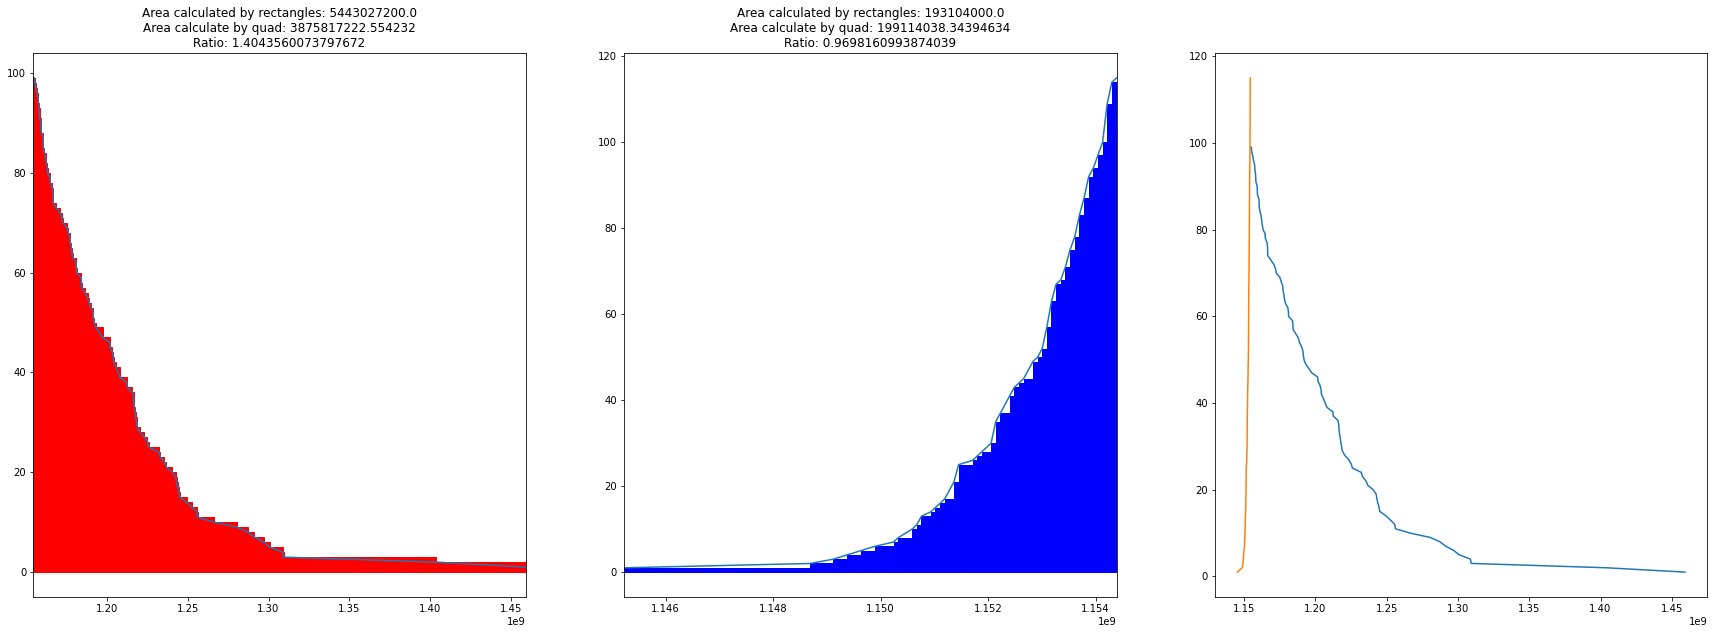

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 3875817222.55 
assess claim area: 199114038.34 
conv area: 0.0 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'before']


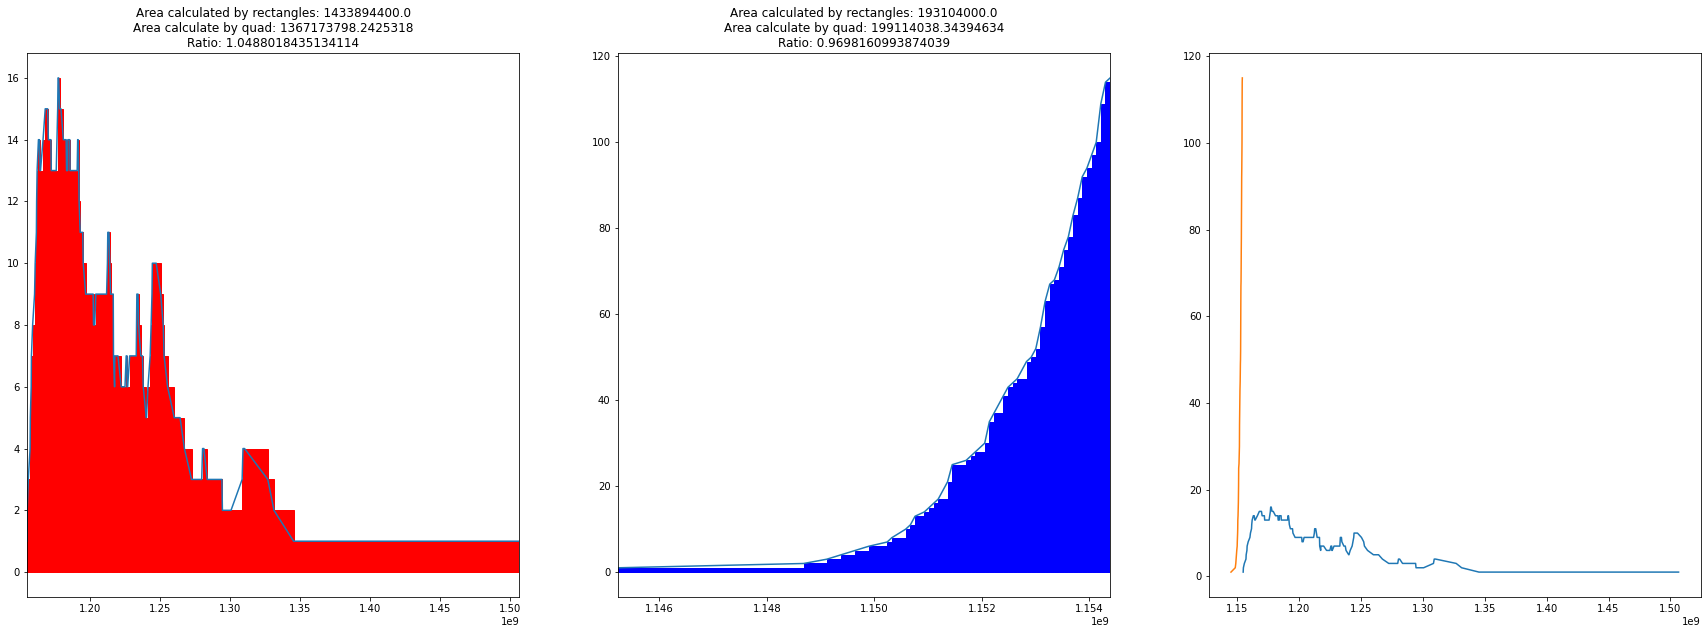

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 1367173798.24 
advise claimant on reimbursement area: 199114038.34 
conv area: 52326.14 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'starts', 'overlaps']


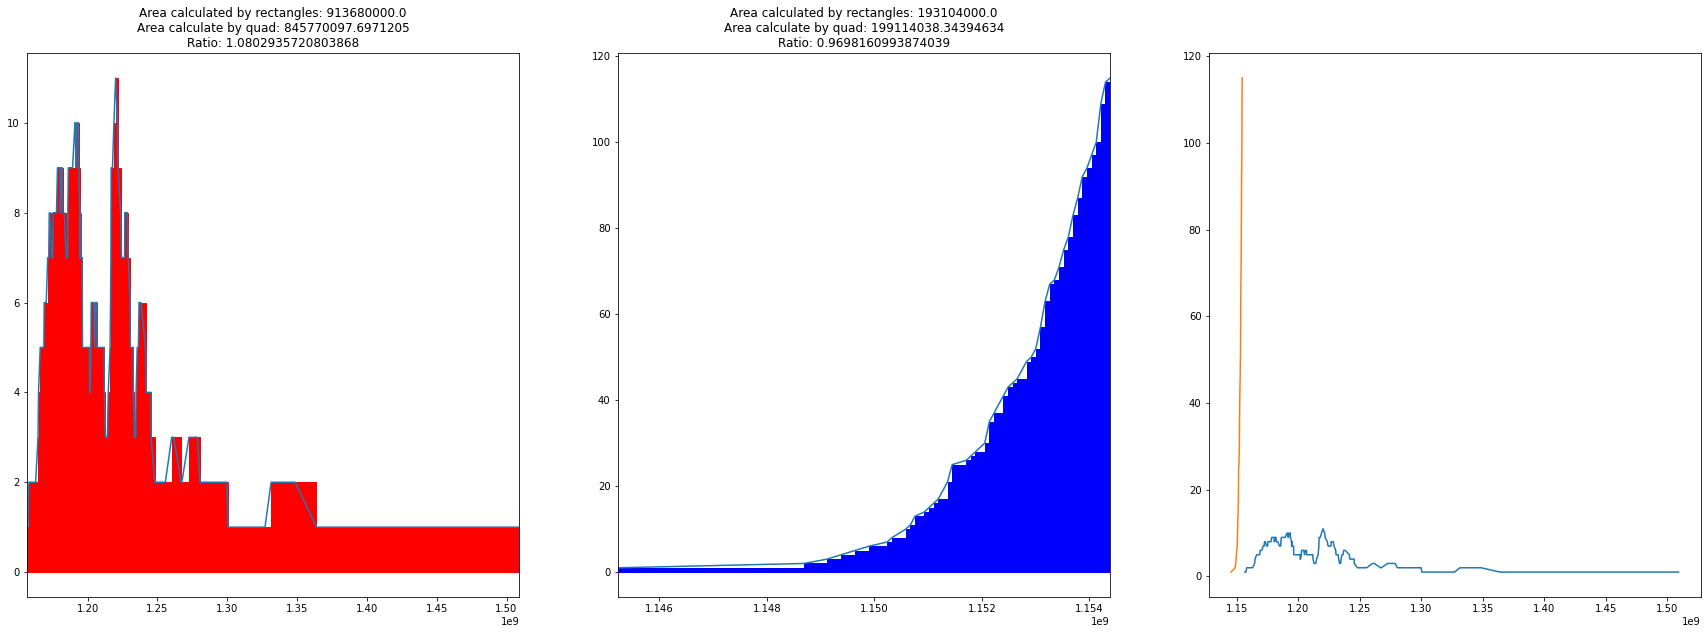

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 845770097.7 
initiate payment area: 199114038.34 
conv area: 2770757.79 

conv/task1: 0 % 
conv/task2: 1 % 

Possible relations: ['meets', 'starts', 'overlaps']


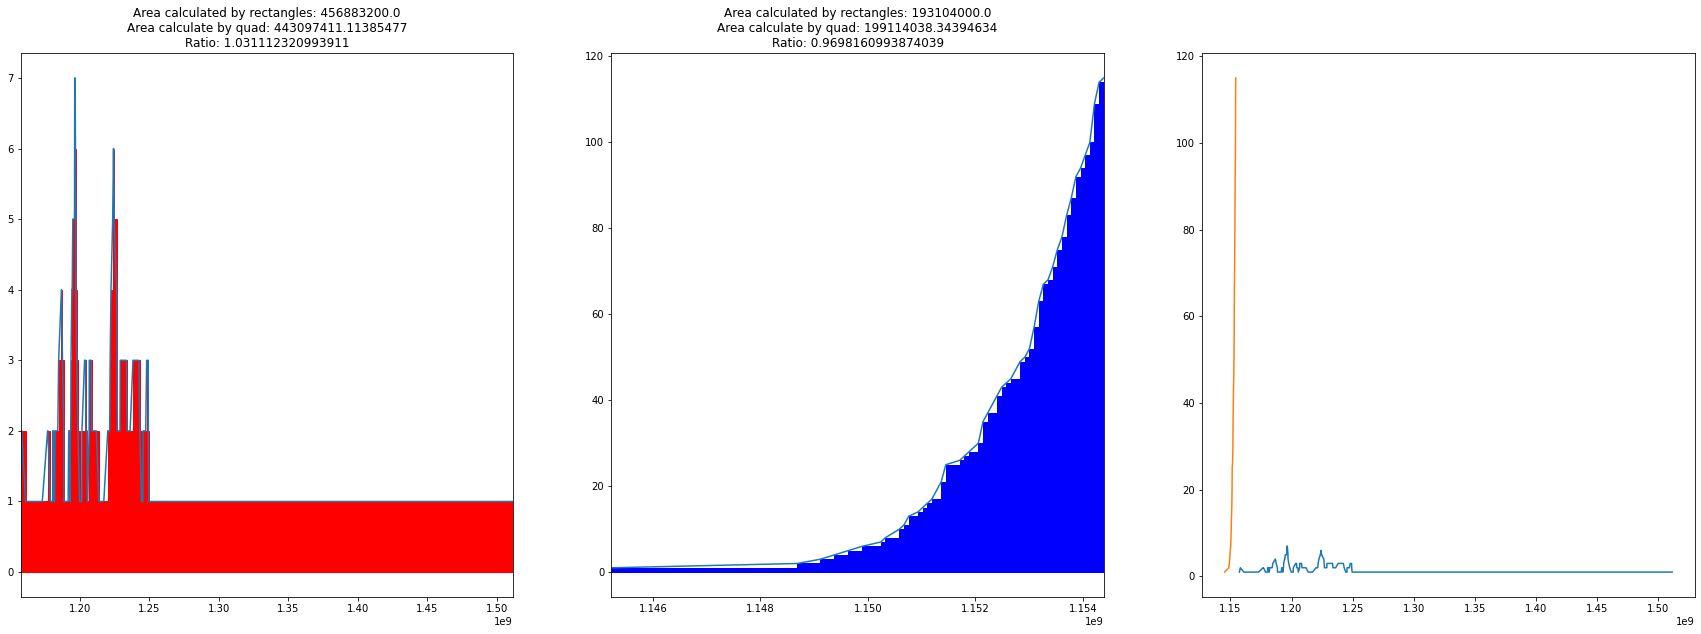

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 443097411.11 
close claim area: 199114038.34 
conv area: -18894376.06 

conv/task1: -4 % 
conv/task2: -9 % 

Possible relations: ['meets', 'starts', 'before', 'overlaps', 'contains', 'equals']


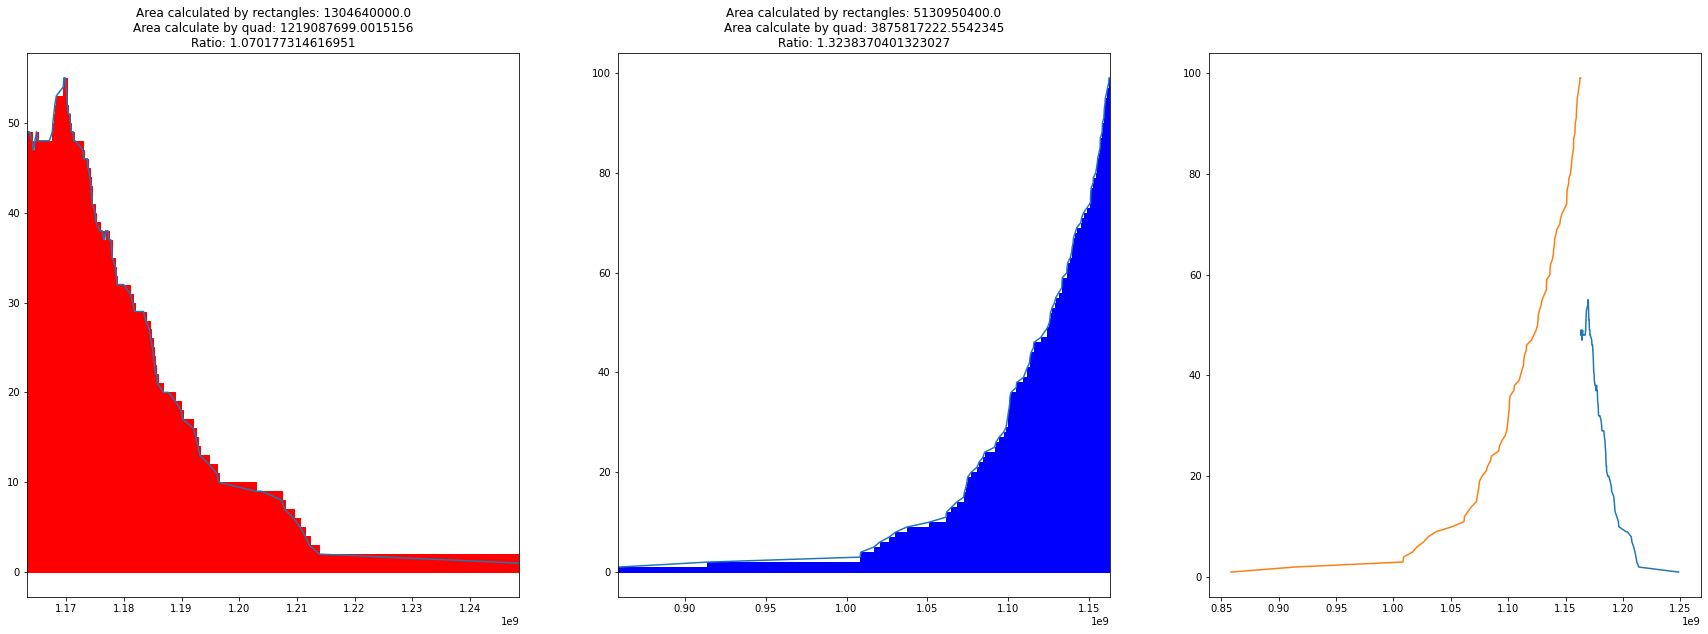

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
assess claim area: 1219087699.0 
advise claimant on reimbursement area: 3875817222.55 
conv area: 0.0 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'before']


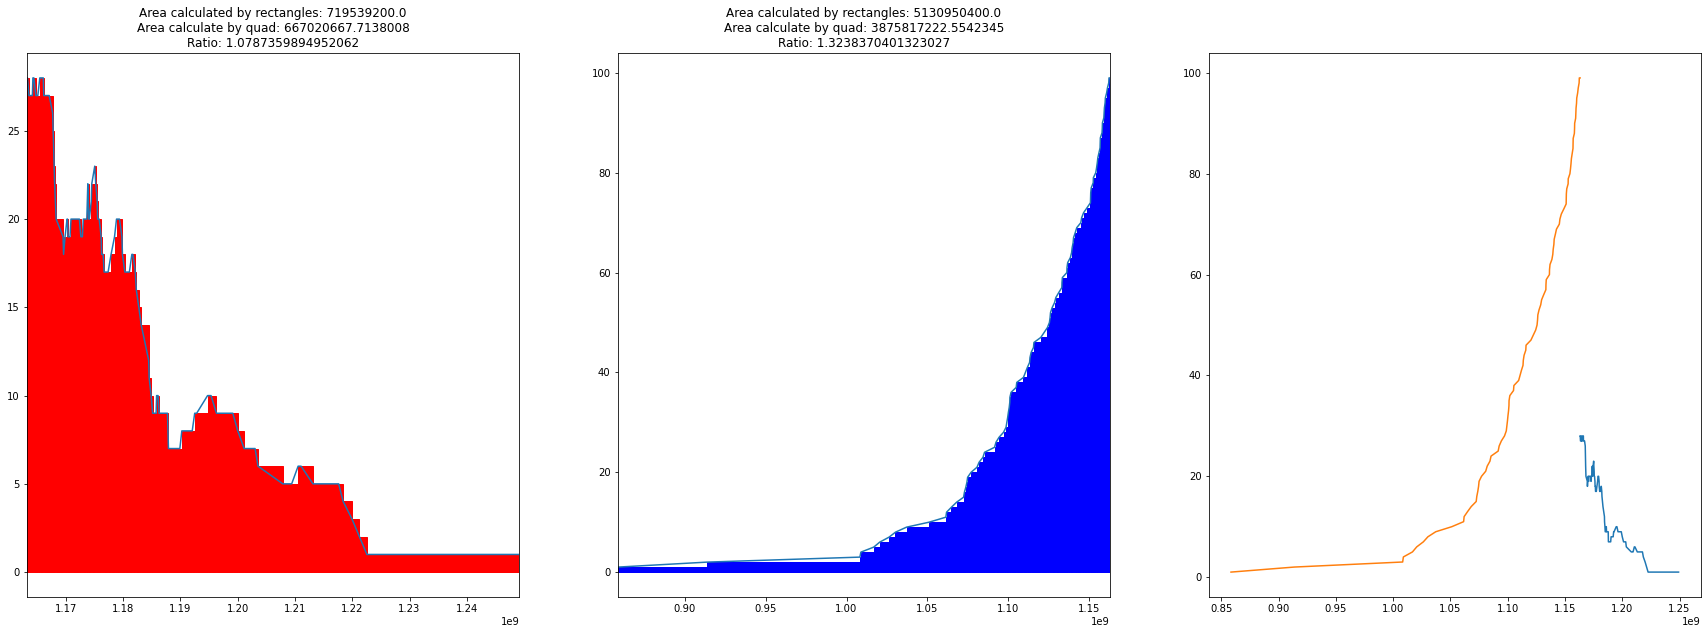

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
assess claim area: 667020667.71 
initiate payment area: 3875817222.55 
conv area: 0.0 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'before']


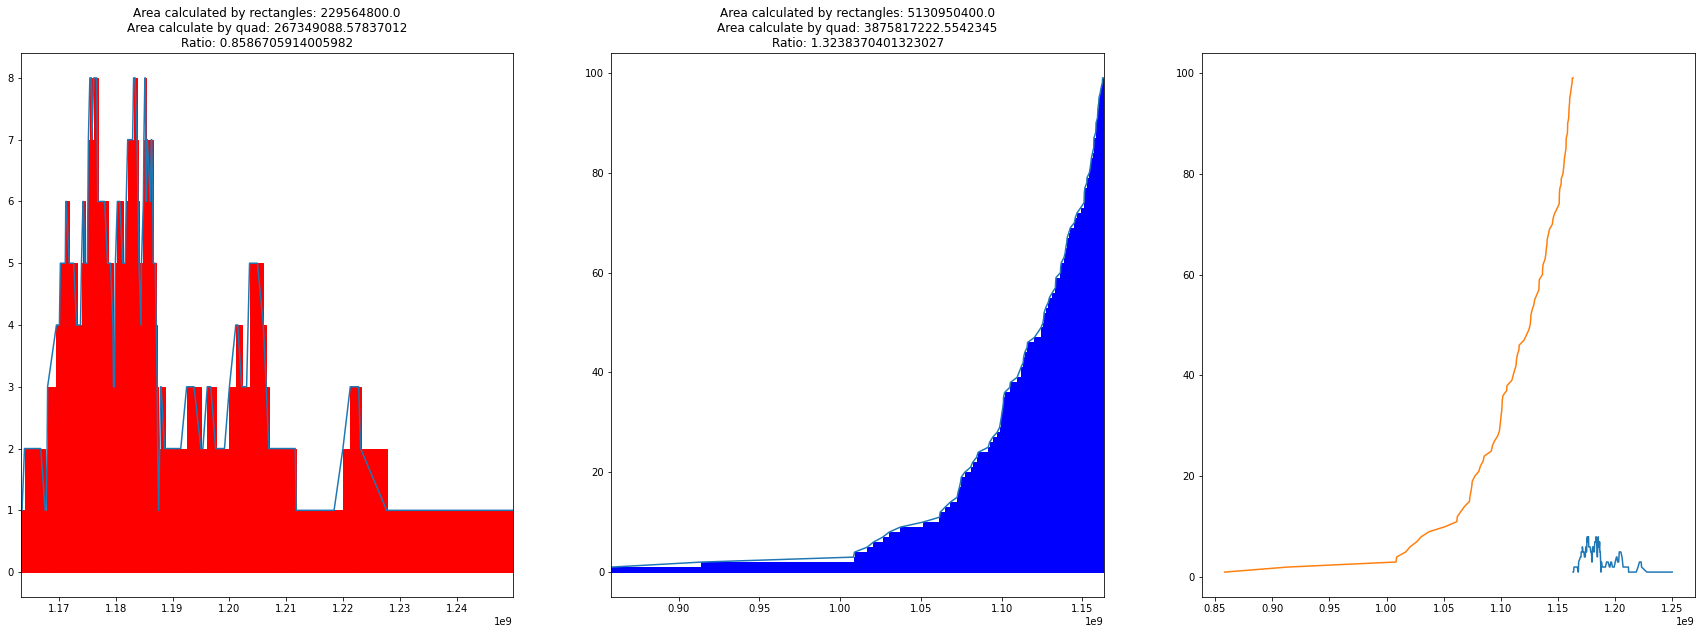

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
assess claim area: 267349088.58 
close claim area: 3875817222.55 
conv area: -86253.67 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'starts', 'before', 'overlaps', 'contains', 'equals']


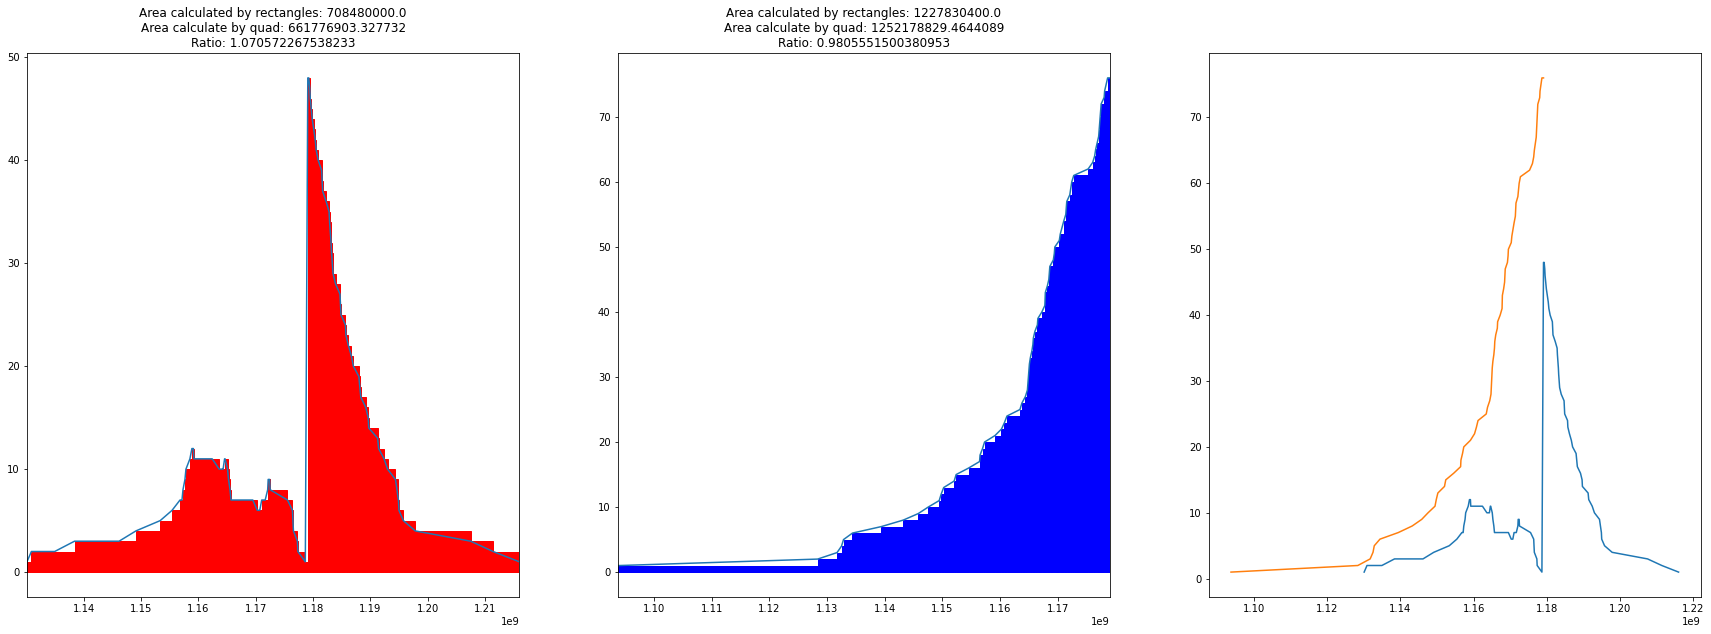

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
advise claimant on reimbursement area: 661776903.33 
initiate payment area: 1252178829.46 
conv area: 246475911.63 

conv/task1: 37 % 
conv/task2: 20 % 

Possible relations: ['meets', 'starts', 'overlaps']


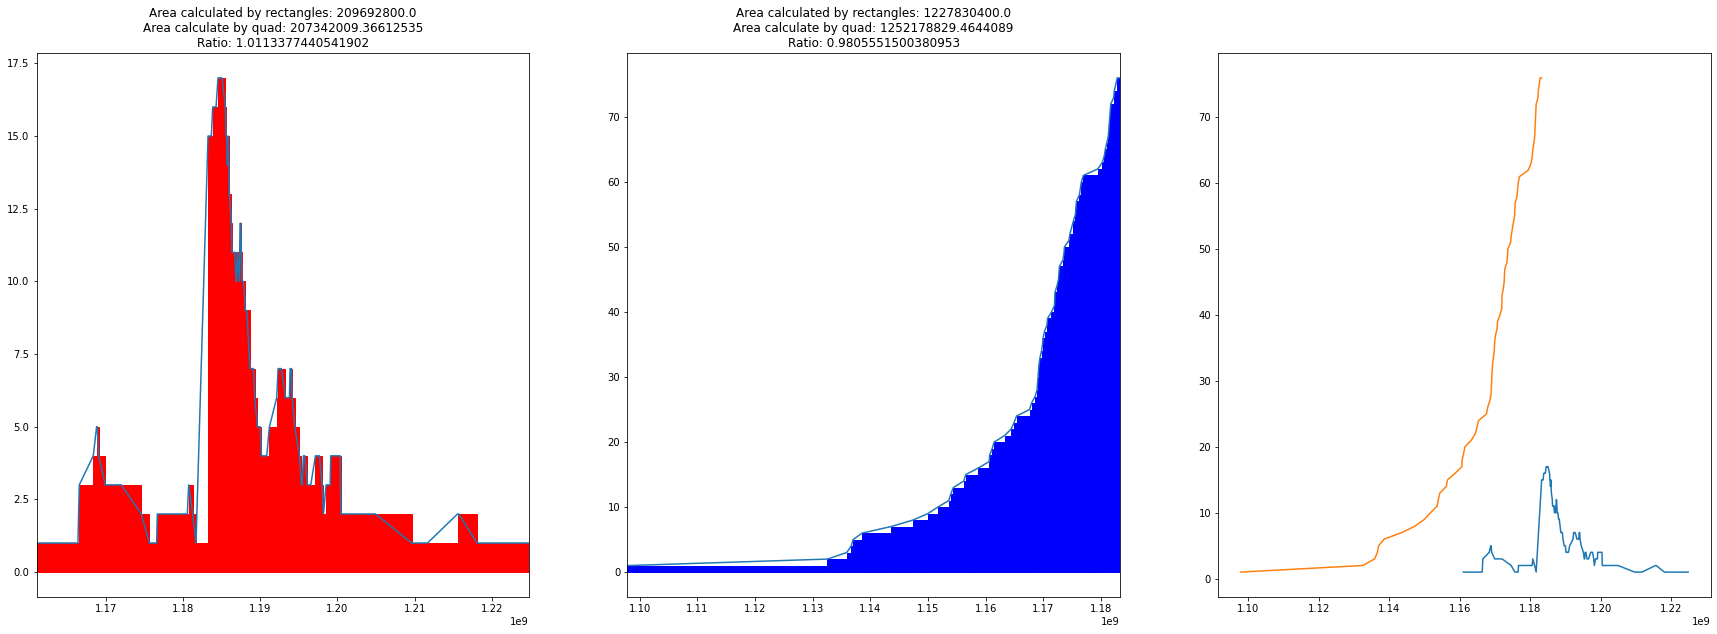

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
advise claimant on reimbursement area: 207342009.37 
close claim area: 1252178829.46 
conv area: 50362199.09 

conv/task1: 24 % 
conv/task2: 4 % 

Possible relations: ['meets', 'starts', 'overlaps']


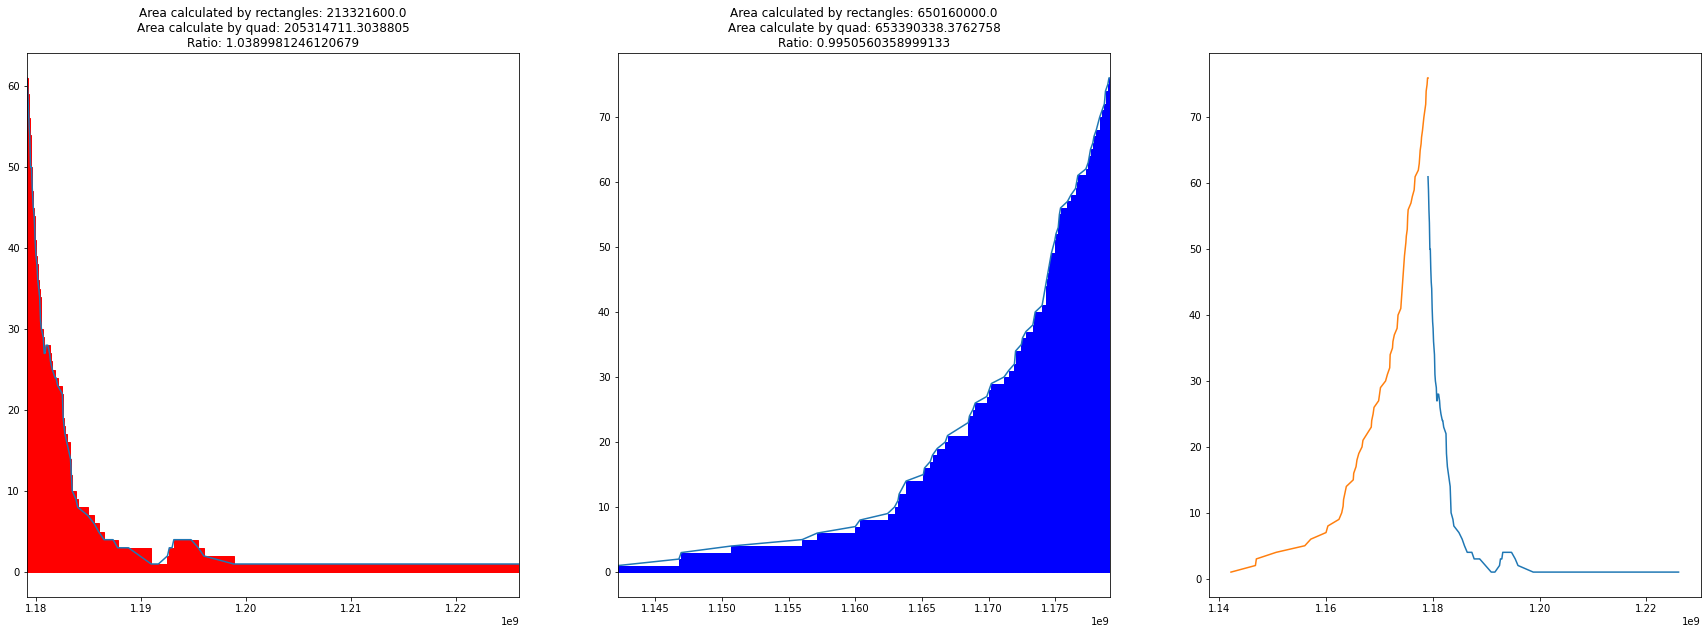

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
initiate payment area: 205314711.3 
close claim area: 653390338.38 
conv area: 0.0 

conv/task1: 0 % 
conv/task2: 0 % 

Possible relations: ['meets', 'before']


In [5]:
tasks: List[str] = ['determine likelihood of claim', 'assess claim', 'advise claimant on reimbursement',
                    'initiate payment', 'close claim']
N: int = len(tasks)

for i in range(N):
    for j in range(i + 1, N):
        possible_relations: List[str] = polynomial_exercise6.core_metod(task1=tasks[j], task2=tasks[i],
                                                                        instance='Claims handler', plot_steps=False,
                                                                        plot_results=True, print_results=True)
        print(f'Possible relations: {possible_relations}')


### Test random logs generator

In [ ]:
generated_logs = generate_logs('overlaps')
list_of_times = []
list_of_fraction = [x for x in np.logspace(-2, 0, 100) if x > 0.01]
results = []

for frac in list_of_fraction:
    t = PolynomialMethod(generated_logs[generated_logs['case_id'].isin(pd.Series(generated_logs['case_id'].unique()).sample(frac=frac, random_state=0))])
    start_time = time.time()
    r = t.core_metod('A', 'B')
    results.append(r)
    execution_time = time.time() - start_time
    print("\r{} %".format(round(100 * list_of_fraction.index(frac)/len(list_of_fraction)),2), end='')
    list_of_times.append(execution_time)

n_task = t.number_of_traces['A']
print('\r       ', end='')
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot([n_task * frac for frac in list_of_fraction], list_of_times, label='Polynomial method')
ax.set(xlabel='Number of traces', ylabel='Time [s]')
ax.grid()
plt.legend()
plt.tight_layout()
plt.show()
print(results)


Generate relation 'A' overlaps 'B' 
97 %0%